Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Getting the Dataset

In [2]:
url="http://bit.ly/w-data"
dataset=pd.read_csv(url)
print("Dataset read successfully")

Dataset read successfully


Printing first 5 records of the Dataset

In [3]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Getting the summary of the Dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Getting to know the statistical details of the Dataset

In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Getting the count of rows and columns in Dataset

In [6]:
dataset.shape

(25, 2)

Plotting a 2 dimensional graph

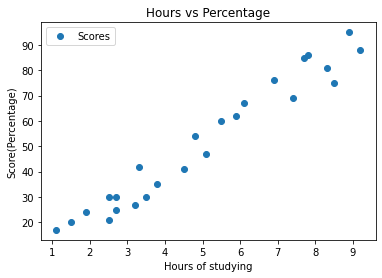

In [7]:
dataset.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours of studying')
plt.ylabel('Score(Percentage)')
plt.show()

**Observation**:
There is a positive linear relation between the number of hours studied and percentage of score.

### **Preparing the data**

Dividing the data into into "attributes" (inputs) and "labels" (outputs).

In [8]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  

Splitting the data into training and testing set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0) 

### **Training the Algorithm**
Data is split into training and testing sets, and now is finally the time to train our algorithm. 

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


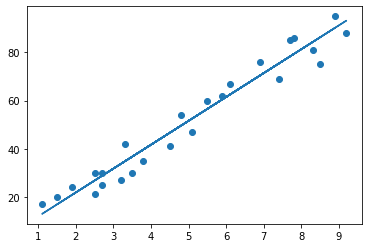

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
We have trained our algorithm, it's time to make some predictions.

In [12]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Comparing the actual values and predicted values

In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


###**Predicted score if the student studies for 9.25 hours**

In [14]:
hours = np.array([9.25])
hours=hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


###**Model Evaluation**

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


# **END OF TASK**